In [1]:
from dataset import Dataset

dataset_file = 'few_shot.txt'
dataset = Dataset(dataset_file)
train, test = dataset.train_test_split(test_size=0.1)

In [2]:
from tokenizer import Tokenizer

tokenizer = Tokenizer(dataset_file)

train, test = tokenizer.tokenize(train), tokenizer.tokenize(test)

In [ ]:
n_embed = 64
batch_size = 64    
block_size = 256
max_iters = 5_000
eval_interval = 500
learning_rate = 3e-4
eval_iters = 100
n_embed = 384
n_heads = 6
n_layers = 6


In [ ]:
from attention_model import LanguageModel, BigramLanguageModel

model = LanguageModel(
    vocab_size=tokenizer.vocab_size,
    n_embed=n_embed,
    block_size=block_size,  
    eval_iters=eval_iters,
    batch_size=batch_size,
    n_layers=n_layers,
    n_head=n_heads
)
'''
model = BigramLanguageModel(
    vocab_size=tokenizer.vocab_size,
    n_embed=n_embed,
    block_size=block_size,  
    eval_iters=eval_iters,
    batch_size=batch_size,
)

'''

In [ ]:
import torch
from tqdm import tqdm

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

log_loss = []
for steps in tqdm(range(max_iters)):


    if steps % eval_interval == 0:
        losses = model.estimate_loss(
            train, 
            test
        )
        train_loss = losses['train']
        eval_loss = losses['eval']
        log_loss.append(eval_loss)
        print(f'step: {steps}, train loss: {train_loss:.4f}, eval loss: {eval_loss:.4f}')
    
    xb, yb = dataset.get_batch(
        train, 
        batch_size=batch_size, 
        block_size=block_size
    )


    logits, loss = model(xb, yb)

    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  0%|          | 0/50 [00:00<?, ?it/s]

step: 0, train loss: 10.9832, eval loss: 10.9830


100%|██████████| 50/50 [11:16<00:00, 13.52s/it]

7.799839019775391


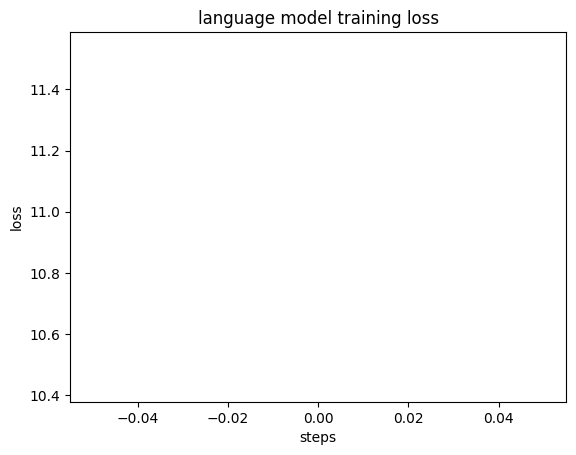

In [ ]:
import matplotlib.pyplot as plt

# create a line plot with losses on the vertical axis and steps on the horizontal axis
plt.plot(range(0, max_iters, eval_interval), log_loss)
plt.xlabel('steps')
plt.ylabel('loss')
plt.title('language model training loss')
plt.show()

In [ ]:
prompt = '''<human>: create a green warm.
<assistant>: '''

tokenized = tokenizer.tokenize(prompt)

input = torch.tensor([tokenized.tolist()], dtype=torch.long)

In [ ]:
preds = model.generate(input, 5000)

In [ ]:
print(tokenizer.detokenize(preds))

<human>: create a green warm.
<assistant>: OM4WAaYglXYUT38oJWQC0LzOaUtW7u8MjFe+M101NsydeXFSJ94CgtfQcbyBHjcsHlF3XlpNSRa73nHQwUQORB
